# Import Libraries

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout

# Download Data

In [ ]:
df = yf.download("BARC.L", start="2015-01-01", end="2025-01-01")
df = df[["Close"]].dropna()
df.head()

/tmp/ipython-input-4-4053218775.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("BARC.L", start="2015-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,BARC.L
Date,
2015-01-02,242.435867
2015-01-05,234.010696
2015-01-06,229.673538
2015-01-07,229.922775
2015-01-08,236.353806


In [ ]:
df.tail()

Price,Close
Ticker,BARC.L
Date,
2024-12-23,261.553436
2024-12-24,263.503052
2024-12-27,264.852844
2024-12-30,264.702850
2024-12-31,268.102264


#Plot Closing Price

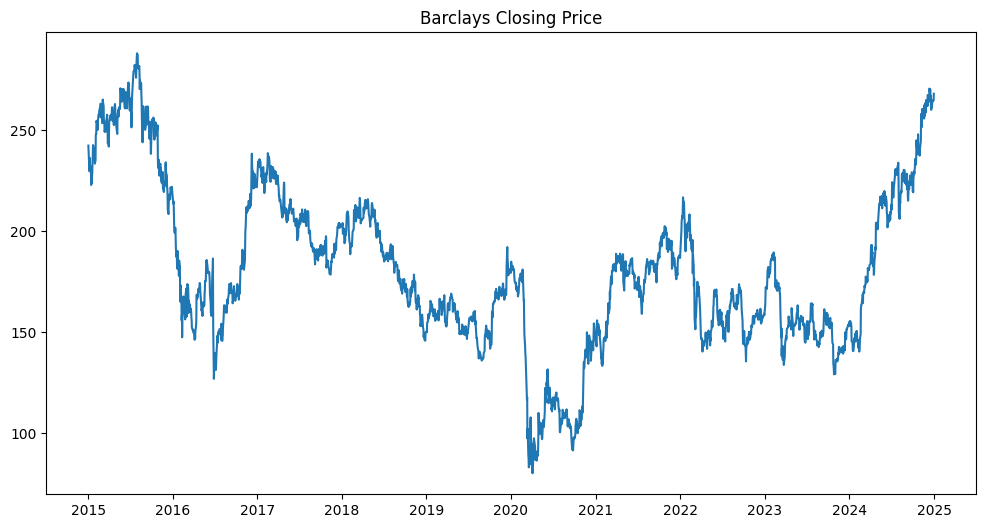

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.title("Barclays Closing Price")
plt.show()

#Preprocess Data

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [ ]:
window_size = 60
X, y = [], []
for i in range(window_size, len(scaled_data)-1):
    X.append(scaled_data[i-window_size:i, 0])
    y.append(scaled_data[i+1, 0])
X, y = np.array(X), np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train-Test Split

In [ ]:
split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]


# Define Models

In [ ]:
def build_lstm():
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [ ]:
def build_gru():
    model = Sequential()
    model.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
    model.add(Dropout(0.2))
    model.add(GRU(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


# Train LSTM

In [ ]:
lstm = build_lstm()
history_lstm = lstm.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0587 - val_loss: 0.0024
Epoch 2/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0044 - val_loss: 0.0016
Epoch 3/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0040 - val_loss: 0.0016
Epoch 4/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0039 - val_loss: 0.0018
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0033 - val_loss: 0.0014
Epoch 6/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0032 - val_loss: 0.0016
Epoch 7/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0035 - val_loss: 0.0016
Epoch 8/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0034 - val_loss: 0.0036
Epoch 9/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0036 - val_loss: 0.0013
Epoch 10/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0032 - val_loss: 0.0012
Epoch 11/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0029 - val_loss: 0.0016
Epoch 12/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.002

#Train GRU

In [ ]:
gru = build_gru()
history_gru = gru.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0655 - val_loss: 0.0021
Epoch 2/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0039 - val_loss: 8.4579e-04
Epoch 3/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0035 - val_loss: 8.6786e-04
Epoch 4/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0031 - val_loss: 0.0010
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0029 - val_loss: 8.3700e-04
Epoch 6/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0029 - val_loss: 8.7274e-04
Epoch 7/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0025 - val_loss: 0.0011
Epoch 8/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0024 - val_loss: 7.9694e-04
Epoch 9/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 10/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0027 - val_loss: 8.2059e-04
Epoch 11/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0024 - val_loss: 0.0013
Epoch 12/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/

#Plot Validation Loss

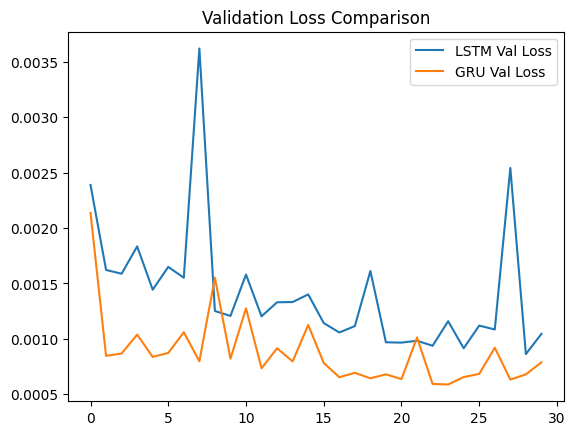

In [ ]:
plt.plot(history_lstm.history['val_loss'], label="LSTM Val Loss")
plt.plot(history_gru.history['val_loss'], label="GRU Val Loss")
plt.legend()
plt.title("Validation Loss Comparison")
plt.show()


In [ ]:
# 📌 Predictions
# LSTM
y_pred_lstm = lstm.predict(X_test)
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)
y_actual = scaler.inverse_transform(y_test.reshape(-1,1))
rmse_lstm = np.sqrt(mean_squared_error(y_actual, y_pred_lstm))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [ ]:
# GRU
y_pred_gru = gru.predict(X_test)
y_pred_gru = scaler.inverse_transform(y_pred_gru)
rmse_gru = np.sqrt(mean_squared_error(y_actual, y_pred_gru))

print(f"LSTM RMSE: {rmse_lstm:.2f}")
print(f"GRU RMSE: {rmse_gru:.2f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
LSTM RMSE: 6.72
GRU RMSE: 5.84


In [ ]:
print(f"LSTM RMSE: {rmse_lstm:.2f}")
print(f"GRU RMSE: {rmse_gru:.2f}")

LSTM RMSE: 6.72
GRU RMSE: 5.84


#Plot Predictions

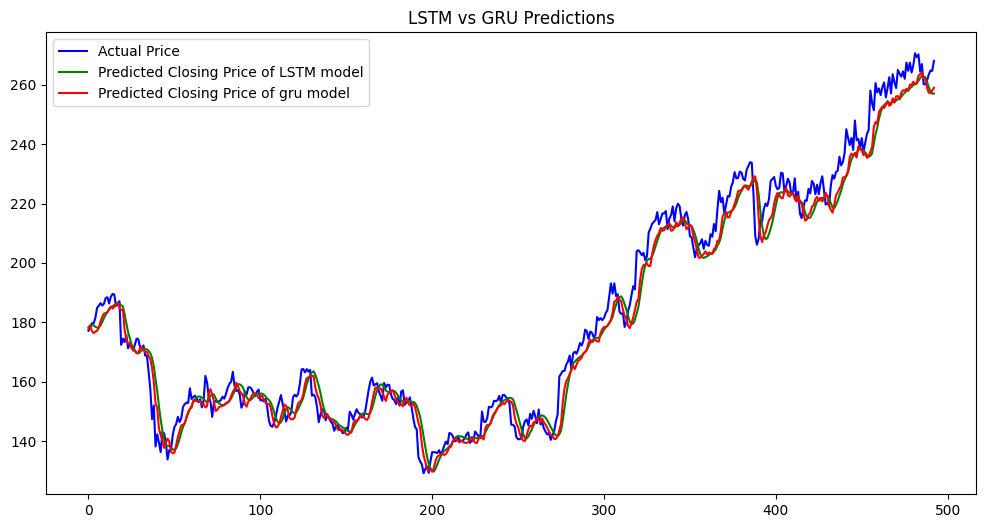

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_actual, label="Actual Price", color='blue')
plt.plot(y_pred_lstm, label="Predicted Closing Price of LSTM model", color='green')
plt.plot(y_pred_gru, label="Predicted Closing Price of gru model", color='red')
plt.legend()
plt.title("LSTM vs GRU Predictions")
plt.show()


#Predict Next Day

In [ ]:
last_60_days = scaled_data[-window_size:]
last_60_days = last_60_days.reshape((1, window_size, 1))

next_lstm_scaled = lstm.predict(last_60_days)
next_lstm_price = scaler.inverse_transform(next_lstm_scaled)

next_gru_scaled = gru.predict(last_60_days)
next_gru_price = scaler.inverse_transform(next_gru_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [ ]:
print(f"Predicted Next Closing Price (LSTM): £{next_lstm_price[0][0]:.2f}")
print(f"Predicted Next Closing Price (GRU): £{next_gru_price[0][0]:.2f}")

Predicted Next Closing Price (LSTM): £258.62
Predicted Next Closing Price (GRU): £261.10
